In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
#from sklearn.feature_selection import RFECV
#from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE
#from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import RandomOverSampler

In [2]:
df=pd.read_excel('data.xlsx')

# spliting the data into train and test 


In [3]:
train,test=train_test_split(df,test_size=0.2,random_state=0)

# EDA on the train data

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24176 entries, 11443 to 2732
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                24176 non-null  int64  
 1   age               24176 non-null  int64  
 2   job               24176 non-null  object 
 3   marital           24176 non-null  object 
 4   education         24176 non-null  object 
 5   default           24176 non-null  int64  
 6   balance           24176 non-null  int64  
 7   housing loan      24176 non-null  int64  
 8   personal loan     24176 non-null  int64  
 9   contact           24176 non-null  object 
 10  day               24176 non-null  int64  
 11  month             24176 non-null  object 
 12  duration          24176 non-null  int64  
 13  duration in min.  24176 non-null  float64
 14  campaign calls    24176 non-null  int64  
 15  pdays             24176 non-null  int64  
 16  previous          24176 non-null  int

In [5]:
train.head()

ID  age          job  marital  education  default  balance  \
11443   3725   47  blue-collar  married    primary        0     1756   
29699  29688   56  blue-collar  married    primary        0      284   
9628   43557   63  blue-collar  married    primary        0      115   
24340  41810   66    housemaid  married    primary        0       40   
16572  32769   30  blue-collar  married  secondary        0      246   

       housing loan  personal loan    contact  day month  duration  \
11443             1              0      other   16   may       207   
29699             0              1  telephone    3   feb       124   
9628              0              0  telephone   27   apr       325   
24340             0              0  telephone   14   oct       290   
16572             1              0   cellular   17   apr       191   

       duration in min.  campaign calls  pdays  previous poutcome  subscribed  
11443          3.450000               1      0         0  unknown           0  
29699          2.066667               4    204         4  failure           0  
9628           5.416667               1    180         7  failure           1  
24340          4.833333               2      0         0  unknown           1  
16572          3.183333               1    150         7  failure           0

In [6]:
train.describe()

ID           age       default        balance  housing loan  \
count  24176.000000  24176.000000  24176.000000   24176.000000  24176.000000   
mean   22613.705121     40.730807      0.018903    1354.048436      0.564610   
std    13017.448372     10.518768      0.136185    3030.912393      0.495818   
min        2.000000     18.000000      0.000000   -8019.000000      0.000000   
25%    11350.750000     32.000000      0.000000      71.750000      0.000000   
50%    22663.500000     39.000000      0.000000     442.000000      1.000000   
75%    33876.500000     48.000000      0.000000    1417.000000      1.000000   
max    45211.000000     95.000000      1.000000  102127.000000      1.000000   

       personal loan          day      duration  duration in min.  \
count   24176.000000  24176.00000  24176.000000      24176.000000   
mean        0.165660     15.90048    256.934025          4.282234   
std         0.371783      8.30071    253.602547          4.226709   
min         0.000000      1.00000      2.000000          0.033333   
25%         0.000000      8.00000    103.750000          1.729167   
50%         0.000000     16.00000    180.000000          3.000000   
75%         0.000000     21.00000    317.000000          5.283333   
max         1.000000     31.00000   3881.000000         64.683333   

       campaign calls         pdays      previous    subscribed  
count    24176.000000  24176.000000  24176.000000  24176.000000  
mean         2.755005     40.979277      0.575984      0.116934  
std          3.068376     99.734219      1.912939      0.321348  
min          1.000000      0.000000      0.000000      0.000000  
25%          1.000000      0.000000      0.000000      0.000000  
50%          2.000000      0.000000      0.000000      0.000000  
75%          3.000000      0.000000      0.000000      0.000000  
max         55.000000    871.000000     58.000000      1.000000

In [7]:
train.isnull().sum()

ID                  0
age                 0
job                 0
marital             0
education           0
default             0
balance             0
housing loan        0
personal loan       0
contact             0
day                 0
month               0
duration            0
duration in min.    0
campaign calls      0
pdays               0
previous            0
poutcome            0
subscribed          0
dtype: int64

<Axes: xlabel='age', ylabel='Count'>

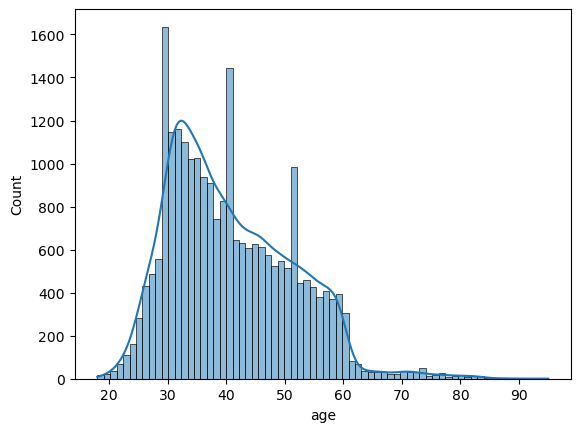

In [8]:
sns.histplot(data=train,x='age',kde=True)

<Axes: xlabel='balance', ylabel='Count'>

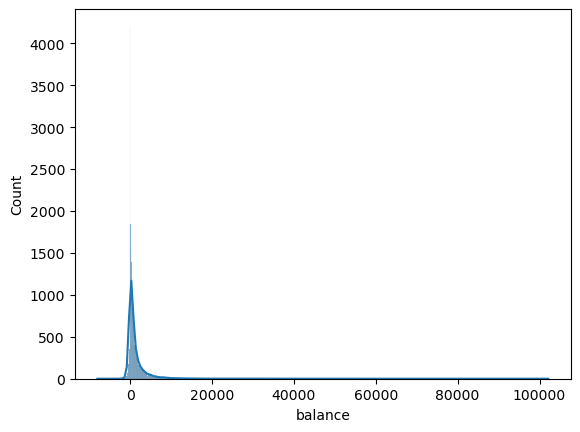

In [9]:
sns.histplot(data=train,x='balance',kde=True)

<Axes: xlabel='duration in min.', ylabel='Count'>

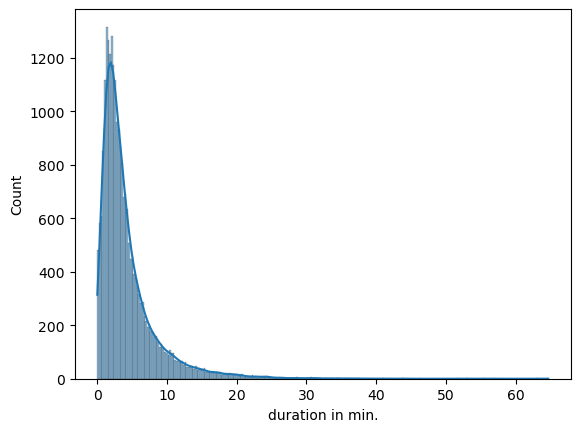

In [10]:
sns.histplot(data=train,x='duration in min.',kde=True)

(array([8.520e+02, 8.082e+03, 8.680e+03, 5.256e+03, 4.699e+03, 2.135e+03,
        2.440e+02, 1.920e+02, 7.400e+01, 7.000e+00]),
 array([18. , 25.7, 33.4, 41.1, 48.8, 56.5, 64.2, 71.9, 79.6, 87.3, 95. ]),
 <BarContainer object of 10 artists>)

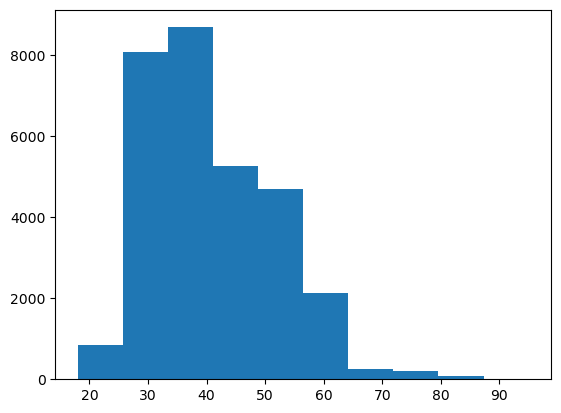

In [11]:
plt.hist(df['age'], bins=10)

# prepration on train and test data

In [12]:
#Divide ages into bins
bins = [18, 23, 30, 40, 50, 60, 95]
labels = [1, 2, 3, 4, 5, 6]
train['age'] = pd.cut(train['age'], bins=bins, labels=labels)

In [13]:
train['age'].value_counts()

3    9604
4    5983
5    4168
2    3553
6     610
1     255
Name: age, dtype: int64

In [14]:
test['age'] = pd.cut(test['age'], bins=bins, labels=labels)

In [15]:
#Divide balance into bins
bins=[-8019, -1000, -1, 0, 200, 1000, 10000, 25000, 103000]
labels=[1, 2, 3, 4, 5, 6, 7, 8]
train['balance'] = pd.cut(train['balance'], bins=bins, labels=labels)
train['balance'].value_counts()

5    7874
6    7343
4    4566
2    1985
3    1895
7     382
1      77
8      53
Name: balance, dtype: int64

In [16]:
test['balance'] = pd.cut(test['balance'], bins=bins, labels=labels)

<Axes: xlabel='balance', ylabel='count'>

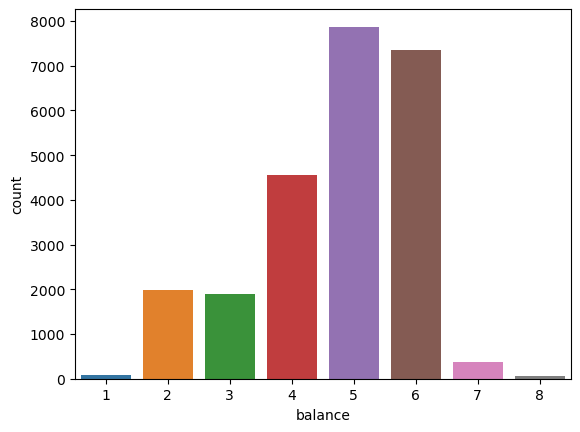

In [17]:
sns.countplot(data=train,x='balance')

In [18]:
#Divide duration into bins
bins=[0,1 ,5 ,10 ,15 ,20 ,25 , 65]
labels=[1, 2, 3, 4, 5, 6, 7]
train['duration in min.'] = pd.cut(train['duration in min.'], bins=bins, labels=labels)
train['duration in min.'].value_counts()

2    15151
3     4498
1     2523
4     1251
5      462
6      185
7      106
Name: duration in min., dtype: int64

<Axes: xlabel='duration in min.', ylabel='count'>

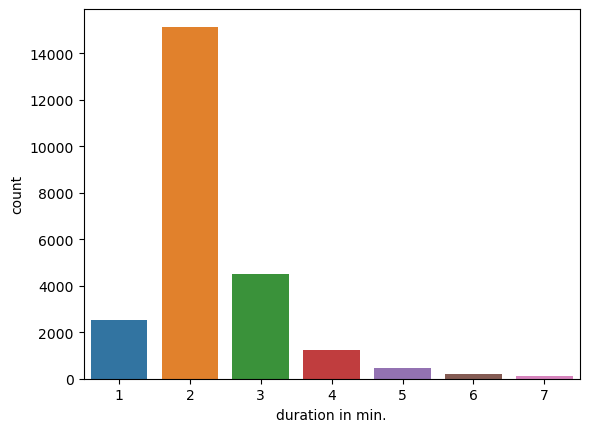

In [19]:
sns.countplot(data=train,x='duration in min.')

In [20]:
test['duration in min.'] = pd.cut(test['duration in min.'], bins=bins, labels=labels)

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24176 entries, 11443 to 2732
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   ID                24176 non-null  int64   
 1   age               24173 non-null  category
 2   job               24176 non-null  object  
 3   marital           24176 non-null  object  
 4   education         24176 non-null  object  
 5   default           24176 non-null  int64   
 6   balance           24175 non-null  category
 7   housing loan      24176 non-null  int64   
 8   personal loan     24176 non-null  int64   
 9   contact           24176 non-null  object  
 10  day               24176 non-null  int64   
 11  month             24176 non-null  object  
 12  duration          24176 non-null  int64   
 13  duration in min.  24176 non-null  category
 14  campaign calls    24176 non-null  int64   
 15  pdays             24176 non-null  int64   
 16  previous          2

In [22]:
train.dropna(inplace= True)

In [23]:
train['age'] = train['age'].astype('int')
test['age'] = test['age'].astype('int')


train['balance'] = train['balance'].astype('int')
test['balance'] = test['balance'].astype('int')


train['duration in min.'] = train['duration in min.'].astype('int')
test['duration in min.'] = test['duration in min.'].astype('int')

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24172 entries, 11443 to 2732
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                24172 non-null  int64 
 1   age               24172 non-null  int32 
 2   job               24172 non-null  object
 3   marital           24172 non-null  object
 4   education         24172 non-null  object
 5   default           24172 non-null  int64 
 6   balance           24172 non-null  int32 
 7   housing loan      24172 non-null  int64 
 8   personal loan     24172 non-null  int64 
 9   contact           24172 non-null  object
 10  day               24172 non-null  int64 
 11  month             24172 non-null  object
 12  duration          24172 non-null  int64 
 13  duration in min.  24172 non-null  int32 
 14  campaign calls    24172 non-null  int64 
 15  pdays             24172 non-null  int64 
 16  previous          24172 non-null  int64 
 17  poutcome 

In [25]:
#Baseline KNN
train_x=train.drop(['month','education','job','marital','poutcome','contact','duration','ID','subscribed'],axis=1)
train_y=train[['subscribed']]
test_x=test.drop(['month','education','job','marital','poutcome','contact','duration','ID','subscribed'],axis=1)
test_y=test[['subscribed']]
knc=KNeighborsClassifier()
knc.fit(train_x,train_y)
knc_train = knc.score(train_x,train_y)*100
knc_test = knc.score(test_x,test_y)*100
print('Train Score: ', knc_train)
print('Test Score: ', knc_test)

C:\Users\Martin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Train Score:  91.20883667052789
Test Score:  88.3209263854425


In [26]:
y_pred = knc.predict(test_x)

accuracy = accuracy_score(test_y, y_pred)
precision = precision_score(test_y, y_pred)
recall = recall_score(test_y, y_pred)
f1 = f1_score(test_y, y_pred)

#Metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)

Accuracy: 0.8832092638544251
Precision: 0.4918032786885246
Recall: 0.2571428571428571
F1: 0.3377110694183864


In [27]:
#Baseline RFC
train_x=train.drop(['personal loan','housing loan','default','month','education','job','marital','poutcome','contact','duration','ID','subscribed'],axis=1)
train_y=train[['subscribed']]
test_x=test.drop(['personal loan','housing loan','default','month','education','job','marital','poutcome','contact','duration','ID','subscribed'],axis=1)
test_y=test[['subscribed']]
rf_model=RandomForestClassifier()
rf_model.fit(train_x,train_y)
rf_train = rf_model.score(train_x,train_y)*100
rf_test = rf_model.score(test_x,test_y)*100
print('Train Score: ', rf_train)
print('Test Score: ', rf_test)

C:\Users\Martin\AppData\Local\Temp\ipykernel_6084\1798874762.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(train_x,train_y)


Train Score:  96.54145292073474
Test Score:  87.97353184449959


In [28]:
y_pred = rf_model.predict(test_x)

accuracy = accuracy_score(test_y, y_pred)
precision = precision_score(test_y, y_pred)
recall = recall_score(test_y, y_pred)
f1 = f1_score(test_y, y_pred)

#Metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)

Accuracy: 0.8797353184449959
Precision: 0.47109207708779444
Recall: 0.3142857142857143
F1: 0.3770351328191945


In [29]:
#Baseline XGBOOST
train_x=train.drop(['month','education','job','marital','poutcome','contact','duration','ID','subscribed'],axis=1)
train_y=train[['subscribed']]
test_x=test.drop(['month','education','job','marital','poutcome','contact','duration','ID','subscribed'],axis=1)
test_y=test[['subscribed']]
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(train_x,train_y)
xgb_train = xgb_model.score(train_x,train_y)*100
xgb_test = xgb_model.score(test_x,test_y)*100
print('Train Score: ', xgb_train)
print('Test Score: ', xgb_test)

C:\Users\Martin\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Train Score:  92.9794803905345
Test Score:  89.19768403639371


In [30]:
y_pred = xgb_model.predict(test_x)

accuracy = accuracy_score(test_y, y_pred)
precision = precision_score(test_y, y_pred)
recall = recall_score(test_y, y_pred)
f1 = f1_score(test_y, y_pred)

#Metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)

Accuracy: 0.8919768403639371
Precision: 0.5545243619489559
Recall: 0.3414285714285714
F1: 0.42263483642793986


<Figure size 1000x1000 with 0 Axes>

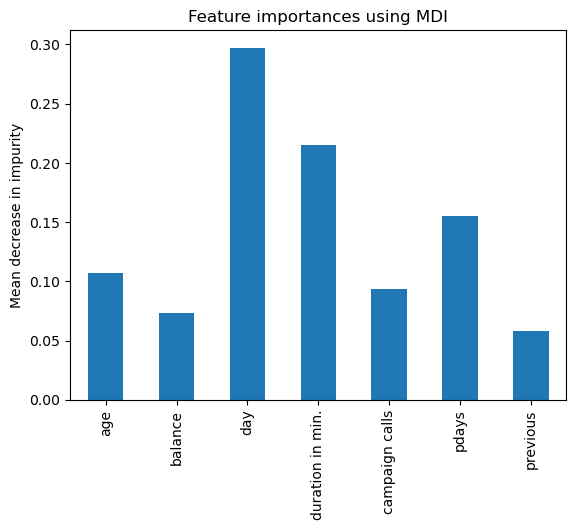

<Figure size 1000x1000 with 0 Axes>

In [31]:
#Applying feature importance
importances = rf_model.feature_importances_
rf_importances = pd.Series(importances, index=['age' , 'balance','day','duration in min.','campaign calls','pdays','previous'])
fig, ax = plt.subplots()
rf_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
plt.figure(figsize=(10, 10))

We used the feature importance just to take a look which features has strong effect on the target, knowing that 'day' feature in numeric and we didn't convert it to be categorical yet.

In [32]:
#RFC after applying feature importance
train_x=train.drop(['previous','personal loan','housing loan','default','month','education','job','marital','poutcome','contact','duration','ID','subscribed'],axis=1)
train_y=train[['subscribed']]
test_x=test.drop(['previous','personal loan','housing loan','default','month','education','job','marital','poutcome','contact','duration','ID','subscribed'],axis=1)
test_y=test[['subscribed']]
rf_model=RandomForestClassifier()
rf_model.fit(train_x,train_y)
rf_train = rf_model.score(train_x,train_y)*100
rf_test = rf_model.score(test_x,test_y)*100
print('Train Score: ', rf_train)
print('Test Score: ', rf_test)

C:\Users\Martin\AppData\Local\Temp\ipykernel_6084\1376902438.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(train_x,train_y)


Train Score:  96.51249379447295
Test Score:  87.82464846980976


In [33]:
y_pred = rf_model.predict(test_x)

accuracy = accuracy_score(test_y, y_pred)
precision = precision_score(test_y, y_pred)
recall = recall_score(test_y, y_pred)
f1 = f1_score(test_y, y_pred)

#Metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)

Accuracy: 0.8782464846980976
Precision: 0.461864406779661
Recall: 0.31142857142857144
F1: 0.3720136518771331


In [34]:
#Baseline KNN after applying feature importance
train_x=train.drop(['personal loan','housing loan','default','month','education','job','marital','poutcome','contact','duration','ID','subscribed'],axis=1)
train_y=train[['subscribed']]
test_x=test.drop(['personal loan','housing loan','default','month','education','job','marital','poutcome','contact','duration','ID','subscribed'],axis=1)
test_y=test[['subscribed']]
knc=KNeighborsClassifier()
knc.fit(train_x,train_y)
knc_train = knc.score(train_x,train_y)*100
knc_test = knc.score(test_x,test_y)*100
print('Train Score: ', knc_train)
print('Test Score: ', knc_test)

C:\Users\Martin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Train Score:  91.1343703458547
Test Score:  88.43672456575682


In [35]:
y_pred = knc.predict(test_x)

accuracy = accuracy_score(test_y, y_pred)
precision = precision_score(test_y, y_pred)
recall = recall_score(test_y, y_pred)
f1 = f1_score(test_y, y_pred)

#Metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)

Accuracy: 0.8843672456575682
Precision: 0.5014005602240896
Recall: 0.2557142857142857
F1: 0.3386944181646168


In [36]:
#Create a recursive feature elimination (RFE)
rfe = RFE(estimator=KNeighborsClassifier(), n_features_to_select=10)
rfe_test = rfe.fit(train_x, train_y)
selected_features = train_x.columns[rfe.support_]
selected_features

C:\Users\Martin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Index(['age', 'balance', 'day', 'duration in min.', 'campaign calls', 'pdays',
       'previous'],
      dtype='object')

In [37]:
train.head()

ID  age          job  marital  education  default  balance  \
11443   3725    4  blue-collar  married    primary        0        6   
29699  29688    5  blue-collar  married    primary        0        5   
9628   43557    6  blue-collar  married    primary        0        4   
24340  41810    6    housemaid  married    primary        0        4   
16572  32769    2  blue-collar  married  secondary        0        5   

       housing loan  personal loan    contact  day month  duration  \
11443             1              0      other   16   may       207   
29699             0              1  telephone    3   feb       124   
9628              0              0  telephone   27   apr       325   
24340             0              0  telephone   14   oct       290   
16572             1              0   cellular   17   apr       191   

       duration in min.  campaign calls  pdays  previous poutcome  subscribed  
11443                 2               1      0         0  unknown           0  
29699                 2               4    204         4  failure           0  
9628                  3               1    180         7  failure           1  
24340                 2               2      0         0  unknown           1  
16572                 2               1    150         7  failure           0

In [38]:
train['job'].value_counts()

blue-collar      5236
management       5178
technician       4105
admin.           2770
services         2266
retired          1177
self-employed     892
entrepreneur      752
unemployed        705
housemaid         689
student           402
Name: job, dtype: int64

In [39]:
#Replacing categorical data with numeric alternatives
train['education'].replace({'primary': 1, 'secondary': 2, 'tertiary': 3}, inplace= True)
test['education'].replace({'primary': 1, 'secondary': 2, 'tertiary': 3}, inplace= True)
#Changing the type to int
train['education']=train['education'].astype('int')
test['education']=test['education'].astype('int')

In [40]:
#Applying one-hot encoding to categorical features
train=pd.get_dummies(train,columns=['job'])
test=pd.get_dummies(test,columns=['job'])

train=pd.get_dummies(train,columns=['marital'])
test=pd.get_dummies(test,columns=['marital'])

train=pd.get_dummies(train,columns=['contact'])
test=pd.get_dummies(test,columns=['contact'])

train=pd.get_dummies(train,columns=['day'])
test=pd.get_dummies(test,columns=['day'])

train=pd.get_dummies(train,columns=['month'])
test=pd.get_dummies(test,columns=['month'])

train=pd.get_dummies(train,columns=['poutcome'])
test=pd.get_dummies(test,columns=['poutcome'])

In [41]:
#KNN final model
train_x=train.drop(['duration','ID','subscribed'],axis=1)
train_y=train[['subscribed']]
test_x=test.drop(['duration','ID','subscribed'],axis=1)
test_y=test[['subscribed']]
knc=KNeighborsClassifier()
knc.fit(train_x,train_y)
knc_train = knc.score(train_x,train_y)*100
knc_test = knc.score(test_x,test_y)*100
print('Train Score: ', knc_train)
print('Test Score: ', knc_test)

C:\Users\Martin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Train Score:  91.89144464669866
Test Score:  89.13151364764268


In [42]:
y_pred = knc.predict(test_x)

accuracy = accuracy_score(test_y, y_pred)
precision = precision_score(test_y, y_pred)
recall = recall_score(test_y, y_pred)
f1 = f1_score(test_y, y_pred)

#Metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)

Accuracy: 0.8913151364764268
Precision: 0.5605633802816902
Recall: 0.2842857142857143
F1: 0.3772511848341232


# XGBOOST before tuning hyperparameters 

In [43]:
#XGBoost Model
train_x=train.drop(['duration','ID','subscribed'],axis=1)
train_y=train[['subscribed']]
test_x=test.drop(['duration','ID','subscribed'],axis=1)
test_y=test[['subscribed']]
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(train_x,train_y)
xgb_train = xgb_model.score(train_x,train_y)*100
xgb_test = xgb_model.score(test_x,test_y)*100
print('Train Score: ', xgb_train)
print('Test Score: ', xgb_test)

C:\Users\Martin\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Train Score:  94.55982128082078
Test Score:  90.27295285359801


In [44]:
y_pred = xgb_model.predict(test_x)

accuracy = accuracy_score(test_y, y_pred)
precision = precision_score(test_y, y_pred)
recall = recall_score(test_y, y_pred)
f1 = f1_score(test_y, y_pred)

#Metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)

Accuracy: 0.9027295285359801
Precision: 0.6089494163424124
Recall: 0.4471428571428571
F1: 0.515650741350906


# XGBOOST after tuning hyperparameters 

In [45]:
#XGBoost Model
train_x=train.drop(['duration','ID','subscribed'],axis=1)
train_y=train[['subscribed']]
test_x=test.drop(['duration','ID','subscribed'],axis=1)
test_y=test[['subscribed']]
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', reg_alpha = 10, reg_lambda = 8, scale_pos_weight=7)
xgb_model.fit(train_x,train_y)
xgb_train = xgb_model.score(train_x,train_y)*100
xgb_test = xgb_model.score(test_x,test_y)*100
print('Train Score: ', xgb_train)
print('Test Score: ', xgb_test)

C:\Users\Martin\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Train Score:  87.84957802416018
Test Score:  85.80645161290322


In [46]:
y_pred = xgb_model.predict(test_x)

accuracy = accuracy_score(test_y, y_pred)
precision = precision_score(test_y, y_pred)
recall = recall_score(test_y, y_pred)
f1 = f1_score(test_y, y_pred)

#Metrics
print("Accuracy:", accuracy*100)
print("Precision:", precision*100)
print("Recall:", recall*100)
print("F1:", f1*100)

Accuracy: 85.80645161290322
Precision: 44.174041297935105
Recall: 85.57142857142857
F1: 58.26848249027237


# XGBOOST with balanced data using SMOTE 

In [47]:
sm = SMOTE(random_state=42)
train_x_sm, train_y_sm = sm.fit_resample(train_x, train_y)

In [48]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', reg_alpha = 8, reg_lambda = 7,)
xgb_model.fit(train_x_sm,train_y_sm)
xgb_train = xgb_model.score(train_x_sm,train_y_sm)*100
xgb_test = xgb_model.score(test_x,test_y)*100
print('Train Score: ', xgb_train)
print('Test Score: ', xgb_test)

C:\Users\Martin\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Train Score:  94.35022955120397
Test Score:  89.33002481389578


In [49]:
y_pred = xgb_model.predict(test_x)

accuracy = accuracy_score(test_y, y_pred)
precision = precision_score(test_y, y_pred)
recall = recall_score(test_y, y_pred)
f1 = f1_score(test_y, y_pred)

#Metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)

Accuracy: 0.8933002481389578
Precision: 0.5333333333333333
Recall: 0.6285714285714286
F1: 0.5770491803278689


# XGBOOST with balanced data using RANDOM_OVER_SAMPLER

In [50]:
ros = RandomOverSampler(random_state=42)
train_x_ros, train_y_ros = ros.fit_resample(train_x, train_y)

In [51]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', reg_alpha = 12, reg_lambda = 7)
xgb_model.fit(train_x_ros,train_y_ros)
xgb_train = xgb_model.score(train_x_ros,train_y_ros)*100
xgb_test = xgb_model.score(test_x,test_y)*100
print('Train Score: ', xgb_train)
print('Test Score: ', xgb_test)

C:\Users\Martin\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Train Score:  90.29794809331959
Test Score:  85.40942928039702


In [52]:
y_pred = xgb_model.predict(test_x)

accuracy = accuracy_score(test_y, y_pred)
precision = precision_score(test_y, y_pred)
recall = recall_score(test_y, y_pred)
f1 = f1_score(test_y, y_pred)

#Metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)

Accuracy: 0.8540942928039702
Precision: 0.43377001455604075
Recall: 0.8514285714285714
F1: 0.5747348119575698
